# Examen del 2do Parcial

1. Utilizando el dataset de _Coactivation_matrix.mat_:
- Calcule el coeficiente de mundo pequeño
- Calcule las comunidades del grafo
- Calcule los hub
- Calcule la eficiencia global
- Calcule la eficiencia local
- Determine el grado de cada nodo

2. Utilizando el dataset de _Coactivation_matrix.mat_:
- Generar el mapa de calor de cada matriz de conectividad
- Generar la distribución de datos de cada matriz de conectividad
- ¿Qué valor se encuentra en el percentil 0.25, 0.5 y 0.75 de la matriz de conectividad?
- Cree los 3 grafos 2D filtrando la matriz de conectividad con los valores dados por los percentiles del ejercicio anterior

3. Utilizando el dataset de _Coactivation_matrix.mat_:
- Genere el grafo 3D
- Haga que el tamaño de nodos sea proporcional a su grado; es decir, q entre mayor sea su grado, mayor sea el tamaño del nodo ploteado
- Haga que el color de las aristas este relacionado al valor de la matriz de conectividad. Utilizar el map color Hot

4. Utilizando el dataset de _chb01_01.edf_:
- Calcule el coeficiente de mundo pequeño
- Calcule las comunidades del grafo
- Calcule los hub
- Calcule la eficiencia global
- Calcule la eficiencia local
- Determine el grado de cada nodo

5. Utilizando el dataset de _chb01_01.edf_:
- Genere el grafo 3D
- Haga que el tamaño de nodos sea proporcional a su grado; es decir, q entre mayor sea su grado, mayor sea el tamaño del nodo ploteado
- Haga que el color de las aristas este relacionado al valor de la matriz de conectividad. Utilizar el map color Hot


In [12]:
import numpy as np
import pandas as pd
import networkx as nx

import seaborn as sns
import matplotlib.pyplot as plt

import scipy.io

In [5]:
import scipy.io

ruta_archivo = r'C:\Users\Admin\OneDrive - UNIVERSIDAD NACIONAL AUTÓNOMA DE MÉXICO\Neurociencias-2026-1\S04_parciales\Coactivation_matrix.mat'

mat_data = scipy.io.loadmat(ruta_archivo)
print("Las variables en el archivo son:", mat_data.keys())


Las variables en el archivo son: dict_keys(['__header__', '__version__', '__globals__', 'Coactivation_matrix', 'Coord'])


In [88]:
matriz=mat_data['Coactivation_matrix']
coord=mat_data['Coord']

In [31]:
df=pd.DataFrame(matriz)

# Teoría de grafos

## Grado

In [26]:
G = nx.from_pandas_adjacency(df)

In [28]:
degree_weighted = G.degree(weight='weight')
print("\n--- Grado de cada nodo (ponderado por fuerza) ---")
print(dict(degree_weighted))
print("\n" + "="*50 + "\n")


--- Grado de cada nodo (ponderado por fuerza) ---
{0: 1.8465526619413672, 1: 1.4953829748436918, 2: 2.18348341393865, 3: 1.9524452849090381, 4: 1.4797810265309406, 5: 2.9898952607869744, 6: 4.906825168530972, 7: 7.023714925040873, 8: 1.4612975481464259, 9: 2.977263409715592, 10: 2.568488660318049, 11: 2.893385543160856, 12: 2.2722216255318015, 13: 2.0628848486359894, 14: 2.299491882578938, 15: 1.8194944882926134, 16: 7.108332155297898, 17: 2.2643585929216217, 18: 4.370227131763906, 19: 6.696382306232076, 20: 3.937933230545047, 21: 1.9086280404126978, 22: 3.336315247006777, 23: 2.4023549690896964, 24: 1.5366552262761015, 25: 2.7282732992421113, 26: 1.2410739994881759, 27: 2.177480762971732, 28: 1.6096463249148925, 29: 2.2962371847984118, 30: 1.6736084114869525, 31: 2.2141879914296365, 32: 1.7974046762347853, 33: 2.0838768729895203, 34: 1.8113324176547805, 35: 3.3573576102216878, 36: 2.6176205656907126, 37: 5.980865855050462, 38: 9.637577305333632, 39: 3.7848128925491946, 40: 4.39079506

## comunidades

In [33]:
communities = nx.community.louvain_communities(G, weight='weight')
for i, community in enumerate(communities):
    print(f"Comunidad {i+1}: {sorted(list(community))}")

Comunidad 1: [2, 3, 7, 16, 19, 38, 40, 42, 44, 45, 50, 57, 60, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 87, 88, 89, 91, 93, 94, 95, 96, 97, 98, 100, 103, 104, 115, 116, 118, 119, 120, 121, 122, 124, 125, 126, 127, 128, 129, 130, 131, 133, 140, 143, 152, 154, 160, 167, 169, 181, 184, 186, 192, 219, 230, 231, 232, 235, 236, 293, 296, 298, 327, 328, 330, 331, 332, 333, 334, 344, 345, 346, 347, 348, 350, 356, 357, 397, 398, 400, 401, 403, 407, 416, 418, 421, 482, 483, 484, 485, 491, 492, 493, 494, 509, 633, 634, 635]
Comunidad 2: [0, 1, 4, 8, 9, 11, 13, 14, 21, 22, 23, 24, 47, 48, 49, 51, 52, 53, 54, 55, 56, 58, 59, 61, 81, 82, 83, 84, 85, 86, 90, 92, 99, 101, 102, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 117, 123, 132, 134, 136, 137, 138, 141, 142, 144, 145, 146, 147, 148, 149, 150, 151, 153, 155, 156, 157, 158, 159, 161, 162, 163, 164, 165, 166, 168, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 182, 183, 187, 188, 189, 190, 191, 198, 

## Hub

In [56]:
# centralidad
centralidad = nx.degree_centrality(G)
print("Nodos hub por centralidad")
C=sorted(centralidad.items(), key=lambda item: item[1], reverse=True)
print(C[:10])
#intermediación
intermediacion=nx.betweenness_centrality(G, weight='weight')
print("\n Nodos hub por intermediación")
In=sorted(intermediacion.items(), key=lambda item: item[1], reverse=True)
print(In[:10])

Nodos hub por centralidad
[(330, 0.28100470957613816), (482, 0.27001569858712715), (230, 0.25745682888540034), (416, 0.25588697017268447), (485, 0.25274725274725274), (235, 0.2511773940345369), (356, 0.24018838304552592), (494, 0.23861852433281006), (350, 0.23704866562009422), (400, 0.23704866562009422)]

 Nodos hub por intermediación
[(621, 0.01183811695941076), (482, 0.010371928161685575), (330, 0.010312688210262336), (50, 0.009453708914625358), (485, 0.009068649230374298), (235, 0.00871320952183486), (497, 0.0086243495947), (276, 0.008249163235686148), (230, 0.007948026815951345), (544, 0.0077110670102583856)]


## Eficiencia Global

In [42]:
H = G.copy()
for u, v, d in H.edges(data=True):
    if d['weight'] > 0:
        d['distance'] = 1 / d['weight']


global_efficiency = nx.global_efficiency(H)
print(f"La eficiencia global de la red es: {global_efficiency:.3f}")


La eficiencia global de la red es: 0.495


## Eficicencia Local

In [43]:

local_efficiency = nx.local_efficiency(H)
print(f"La eficiencia local promedio de la red es: {local_efficiency:.4f}")

La eficiencia local promedio de la red es: 0.6644


## Mundo pequeño

In [45]:
Clustering = nx.average_clustering(G, weight='weight')

Long = nx.average_shortest_path_length(G, weight='weight')

print(f"Clustering original: {Clustering:.4f}")
print(f"Longitud original: {Long:.4f}")

Clustering original: 0.0663
Longitud original: 0.0818


In [47]:
# red aleatoria
n_random_graphs = 100  # Número de redes aleatorias para promediar
C_rand_sum = 0
L_rand_sum = 0

n = G.number_of_nodes()
m = G.number_of_edges()

for cont in range(n_random_graphs):
    # red con mismos nodos y aristas
    G_rand = nx.gnm_random_graph(n, m)
    if nx.is_connected(G_rand):
        C_rand_sum += nx.average_clustering(G_rand)
        L_rand_sum += nx.average_shortest_path_length(G_rand)

C_rand = C_rand_sum / n_random_graphs
L_rand = L_rand_sum / n_random_graphs

print(f"Clustering promedio de redes aleatorias (C_rand): {C_rand:.4f}")
print(f"Longitud de camino promedio de redes aleatorias (L_rand): {L_rand:.4f}")

\Clustering promedio de redes aleatorias (C_rand): 0.0917
Longitud de camino promedio de redes aleatorias (L_rand): 1.9126


In [54]:
if C_rand > 0 and L_rand > 0:
        gamma = Clustering / C_rand
        lambda_ = Long / L_rand
        sigma = gamma / lambda_

if sigma > 1:
        print("red es 'mundo pequeño'.")
else:
        print("red NO es 'mundo pequeño'.")

red es 'mundo pequeño'.


# Matrices de conectividad

In [57]:
sfreq_target = 256            # Frecuencia de muestreo a la que normalizamos (Hz)
fmin, fmax = 8, 13            # Banda alfa para la coherencia (puedes ajustar)

from scipy.signal import coherence, hilbert


In [58]:
# ====== 1. MATRIZ DE CORRELACIÓN DE PEARSON ======
corr_matrix = np.corrcoef(matriz)
corr_df = pd.DataFrame(corr_matrix)

# ====== 2. MATRIZ DE COHERENCIA ESPECTRAL ======
n_channels=638
coh_matrix = np.zeros((n_channels, n_channels))
for i in range(n_channels):
    for j in range(n_channels):
        f, Cxy = coherence(matriz[i], matriz[j], fs=sfreq_target, nperseg=sfreq_target*2)
        mask = (f >= fmin) & (f <= fmax)
        coh_matrix[i, j] = np.mean(Cxy[mask])

coh_df = pd.DataFrame(coh_matrix)

# ====== 3. MATRIZ DE PHASE LOCKING VALUE (PLV) ======
analytic_signal = hilbert(matriz)
phase_data = np.angle(analytic_signal)

plv_matrix = np.zeros((n_channels, n_channels))
for i in range(n_channels):
    for j in range(n_channels):
        phase_diff = phase_data[i] - phase_data[j]
        plv_matrix[i, j] = np.abs(np.sum(np.exp(1j * phase_diff)) / phase_diff.size)

plv_df = pd.DataFrame(plv_matrix)

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\signal\_spectral_py.py:1858: RuntimeWarning: invalid value encountered in divide
  Cxy = np.abs(Pxy)**2 / Pxx / Pyy


In [77]:
n_channels=638
coh_matrix = np.zeros((n_channels, n_channels))
for i in range(n_channels):
    for j in range(n_channels):
        f, Cxy = coherence(matriz[i], matriz[j], fs=sfreq_target, nperseg=sfreq_target*2)
        mask = (f >= fmin) & (f <= fmax)
        coh_matrix[i, j] = np.mean(Cxy[mask])

coh_df = pd.DataFrame(coh_matrix)

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\signal\_spectral_py.py:1858: RuntimeWarning: invalid value encountered in divide
  Cxy = np.abs(Pxy)**2 / Pxx / Pyy


## Matriz de correlación

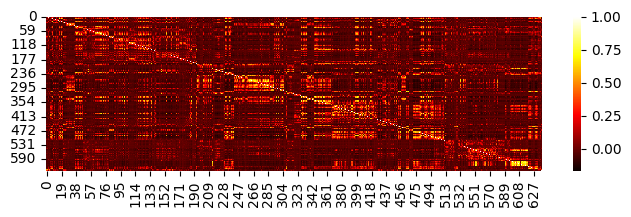

Percentil 25 (Q1): -0.0547
Percentil 50 (Mediana): -0.0321
Percentil 75 (Q3): 0.0209


Text(0.5, 1.0, 'Conexiones > Percentil 75')

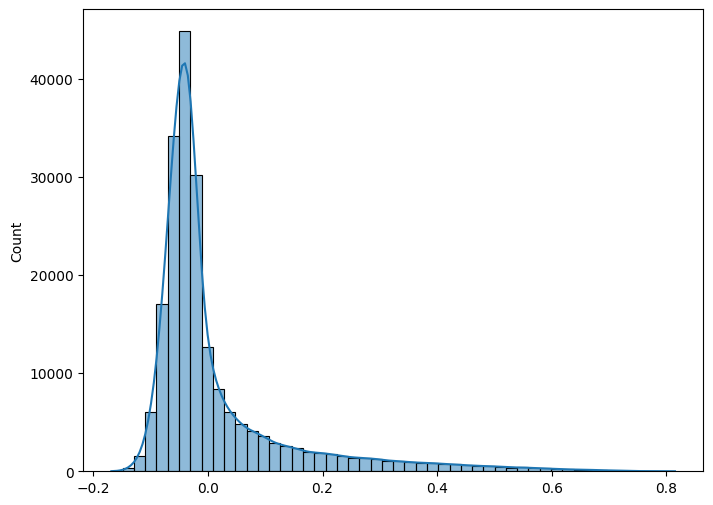

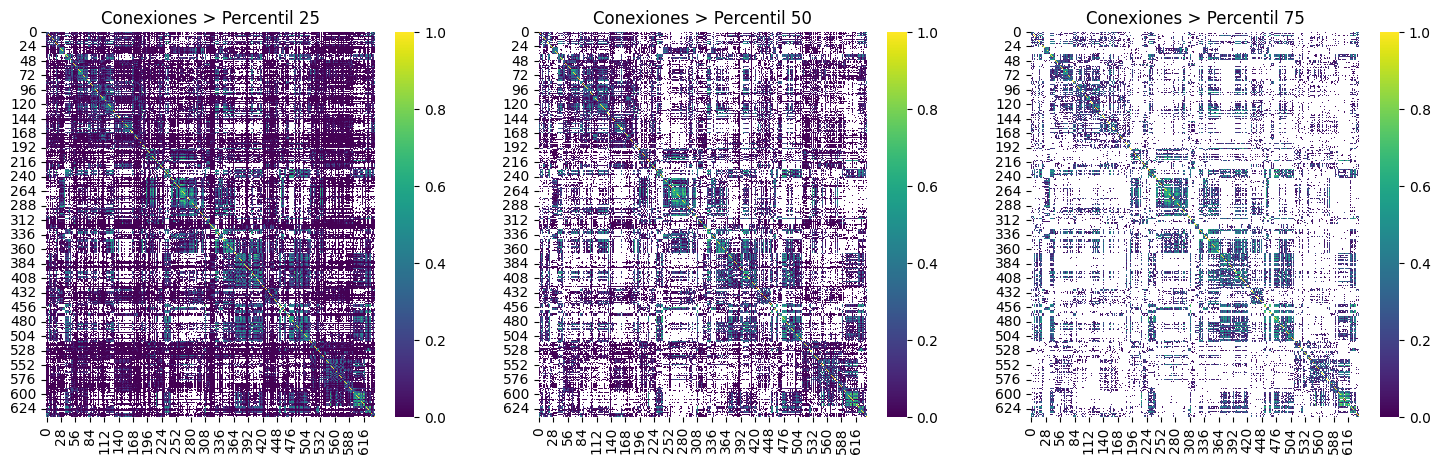

In [83]:
plt.figure(figsize=(8, 2))
co= sns.heatmap(corr_df.values,
                 annot=False, cmap='hot', fmt=".2f")
ax.set(xlabel="channels", ylabel="channels")
plt.show()

# Distribución
plt.figure(figsize=(8, 6))
valores_corr = corr_df.values[np.triu_indices_from(corr_df, k=1)]
sns.histplot(valores_corr, kde=True, bins=50)

#percentiles
p25 = np.percentile(valores_corr, 25)  # Percentil 25 o primer cuartil (Q1)
p50 = np.percentile(valores_corr, 50)  # Percentil 50 o mediana (Q2)
p75 = np.percentile(valores_corr, 75)  # Percentil 75 o tercer cuartil (Q3)

print(f"Percentil 25 (Q1): {p25:.4f}")
print(f"Percentil 50 (Mediana): {p50:.4f}")
print(f"Percentil 75 (Q3): {p75:.4f}")

#Gráficas
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
matriz_filtrada_25 = corr_df.copy()
matriz_filtrada_25[matriz_filtrada_25 < p25] = np.nan
sns.heatmap(matriz_filtrada_25, ax=axes[0], cmap='viridis', vmin=0, vmax=1)
axes[0].set_title(f'Conexiones > Percentil 25')

matriz_filtrada_50 = corr_df.copy()
matriz_filtrada_50[matriz_filtrada_50 < p50] = np.nan
sns.heatmap(matriz_filtrada_50, ax=axes[1], cmap='viridis', vmin=0, vmax=1)
axes[1].set_title(f'Conexiones > Percentil 50')

matriz_filtrada_75=corr_df.copy()
matriz_filtrada_75[matriz_filtrada_75 < p75]=np.nan
sns.heatmap(matriz_filtrada_75,ax=axes[2], cmap='viridis', vmin=0, vmax=1)
axes[2].set_title(f'Conexiones > Percentil 75')

## Matriz de coherencia espectral

No pude prof :((


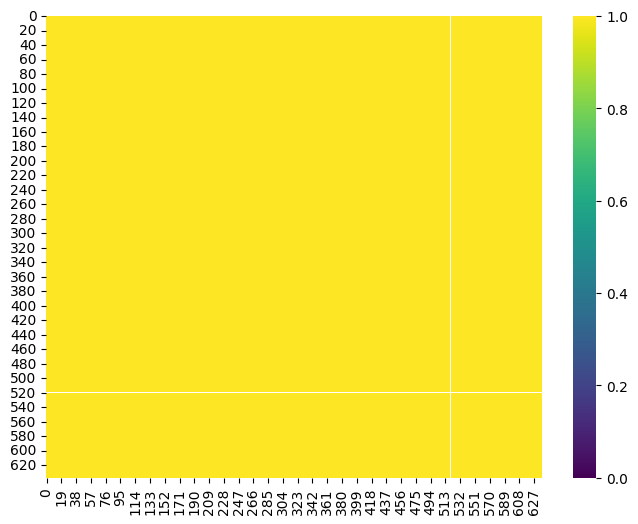

In [79]:
plt.figure(figsize=(8, 6))
sns.heatmap(coh_df, cmap='viridis', vmin=0, vmax=1)

# Distribución
#plt.figure(figsize=(8, 6))
#valores_coh = coh_df.values[np.triu_indices_from(coh_df, k=1)]
#num_valores_unicos = len(np.unique(valores_coh))
#n_bins=min(10,num_valores_unicos)
#sns.histplot(valores_coh, kde=True,color='green')

print(f'No pude prof :((')

## PLV Matriz

Percentil 25 (Q1): 0.0709
Percentil 50 (Mediana): 0.1300
Percentil 75 (Q3): 0.2250


Text(0.5, 1.0, 'Conexiones > Percentil 75')

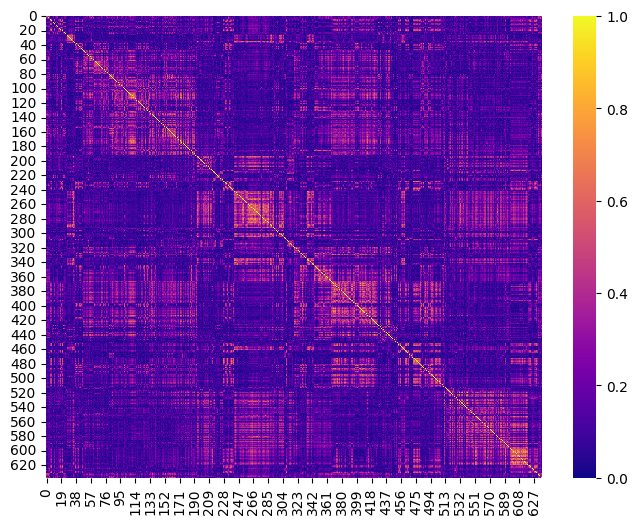

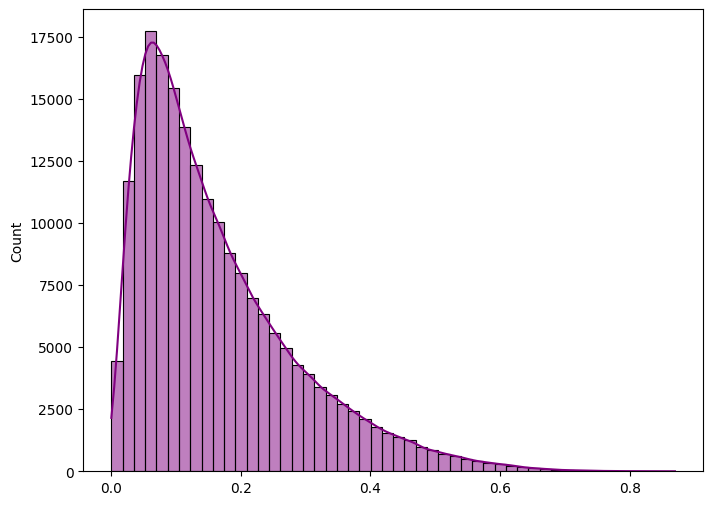

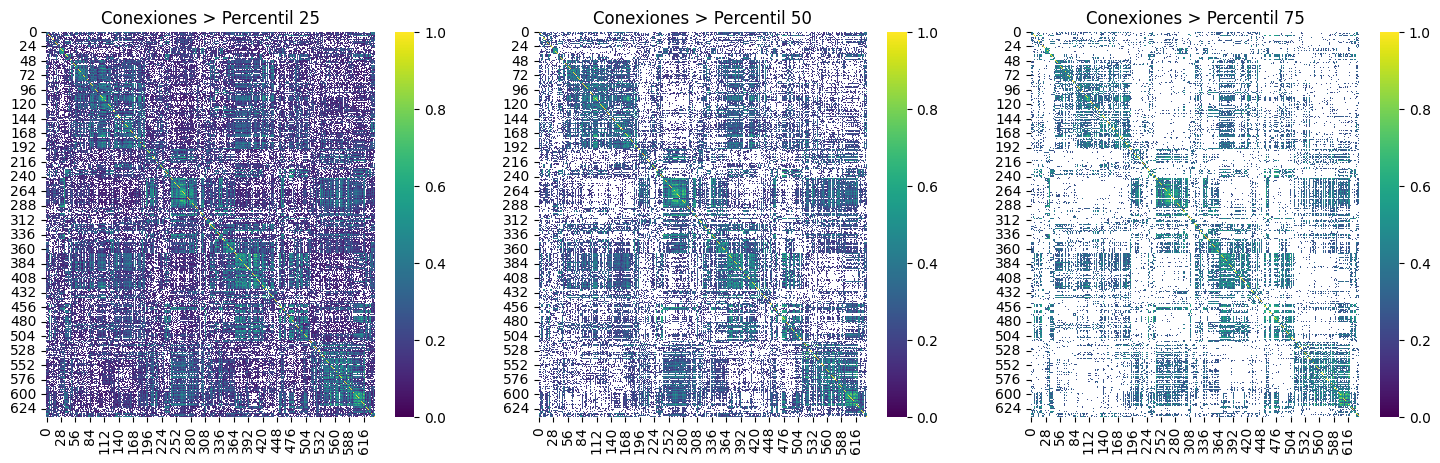

In [84]:
plt.figure(figsize=(8, 6))
sns.heatmap(plv_df, cmap='plasma', vmin=0, vmax=1)
plt.figure(figsize=(8, 6))
valores_plv = plv_df.values[np.triu_indices_from(plv_df, k=1)]
sns.histplot(valores_plv, kde=True, bins=50, color='purple')

#percentiles
p25 = np.percentile(valores_plv, 25)  # Percentil 25 o primer cuartil (Q1)
p50 = np.percentile(valores_plv, 50)  # Percentil 50 o mediana (Q2)
p75 = np.percentile(valores_plv, 75)  # Percentil 75 o tercer cuartil (Q3)

print(f"Percentil 25 (Q1): {p25:.4f}")
print(f"Percentil 50 (Mediana): {p50:.4f}")
print(f"Percentil 75 (Q3): {p75:.4f}")

#Gráficas
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
matriz_filtrada_25 = plv_df.copy()
matriz_filtrada_25[matriz_filtrada_25 < p25] = np.nan
sns.heatmap(matriz_filtrada_25, ax=axes[0], cmap='viridis', vmin=0, vmax=1)
axes[0].set_title(f'Conexiones > Percentil 25')

matriz_filtrada_50 = plv_df.copy()
matriz_filtrada_50[matriz_filtrada_50 < p50] = np.nan
sns.heatmap(matriz_filtrada_50, ax=axes[1], cmap='viridis', vmin=0, vmax=1)
axes[1].set_title(f'Conexiones > Percentil 50')

matriz_filtrada_75=plv_df.copy()
matriz_filtrada_75[matriz_filtrada_75 < p75]=np.nan
sns.heatmap(matriz_filtrada_75,ax=axes[2], cmap='viridis', vmin=0, vmax=1)
axes[2].set_title(f'Conexiones > Percentil 75')

# Grafo 3D de matriz de conectividad

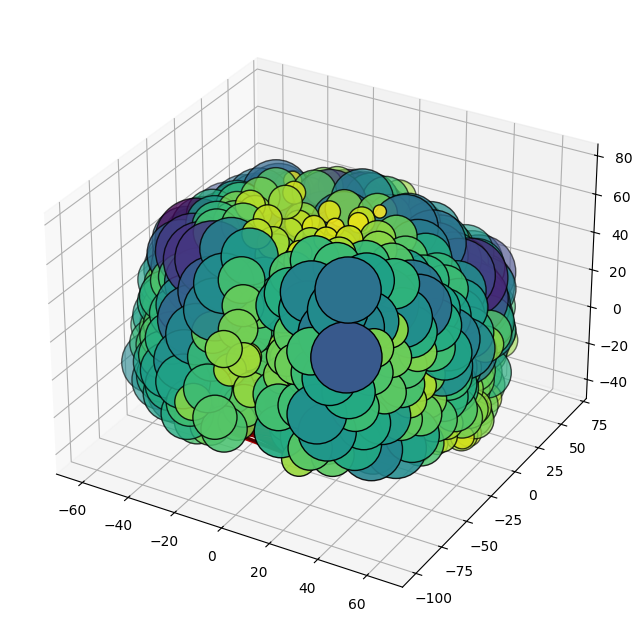

In [98]:
num_nodos = 638
matriz_conectividad = (matriz+ matriz.T) / 2
np.fill_diagonal(matriz_conectividad, 0)

G= nx.from_numpy_array(matriz_conectividad)
grados = [val for (node, val) in G.degree()]
tamaño_nodos = [g * 20 + 10 for g in grados]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

#aristas
mapa_colores=plt.get_cmap('hot')
min_val=np.min(matriz_conectividad[matriz_conectividad >0])
max_val=np.max(matriz_conectividad)

for i in range(num_nodos):
    for j in range(i+1,num_nodos):

        if matriz_conectividad[i,j]>0:
            puntoI=coord[i]
            puntoF=coord[j]
            conexion_val=matriz_conectividad[i,j]
            color=mapa_colores((conexion_val-min_val)/(max_val-min_val))

            ax.plot ( [puntoI[0],puntoF[0]], [puntoI[1],puntoF[1]], [puntoI[2],puntoF[2]],color=color,linewidth=2)

x_nodos=coord[:,0]
y_nodos=coord[:,1]
z_nodos=coord[:,2]

ax.scatter(x_nodos,  y_nodos,z_nodos,s=tamaño_nodos,c=grados,cmap='viridis_r',ec='black')

plt.show()